In [1]:
using Revise
using BiMDPs

In [2]:
rgw = RoverGridWorld.RoverGridWorldMDP(
    grid_size = (20,20),
    p_transition = 1.0,
    reward_vals = Dict((18,3)=>100),
    γ = 0.95)

BiMDPs.RoverGridWorld.RoverGridWorldMDP
  grid_size: Tuple{Int64, Int64}
  null_state: BiMDPs.RoverGridWorld.State
  p_transition: Float64 1.0
  γ: Float64 0.95
  reward_vals: Dict{Tuple{Int64, Int64}, Float64}


## Plot rewards grid

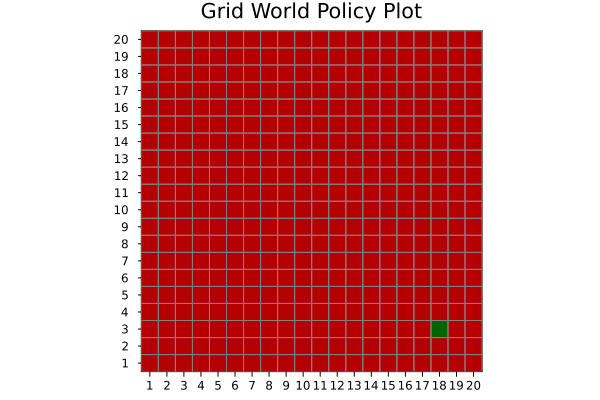

In [3]:
RoverGridWorld.plot_grid_world(rgw)

## Solving

In [4]:
@time policy = RoverGridWorld.solve_using("vi", rgw, vi_max_iterations = 5000);

  0.199415 seconds (903.91 k allocations: 29.959 MiB, 87.44% compilation time)


In [5]:
@time q_learning_policy = RoverGridWorld.solve_using("qlearning", rgw, q_n_episodes=5000);

  1.053229 seconds (26.94 M allocations: 778.473 MiB, 14.46% gc time)


In [6]:
@time sarsa_policy = RoverGridWorld.solve_using("sarsa", rgw, sarsa_n_episodes=5000);

  1.054391 seconds (27.81 M allocations: 810.885 MiB, 11.12% gc time)


## Compare different policies

In [7]:
results = RoverGridWorld.run_simulation(rgw, policy, q_learning_policy, sarsa_policy; N_sim = 500, max_steps = 500);

result of 1 sim using VI policy:46.32912301597529


N_sim = 500
window = 166


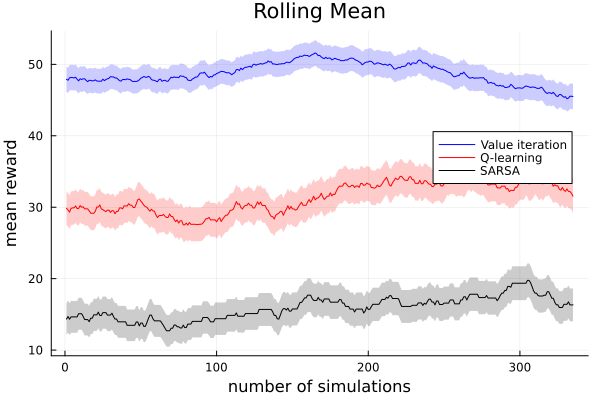

In [8]:
RoverGridWorld.plot_simulation_results(results)

## Get undiscounted rewards

In [9]:
rgw_nodisc = RoverGridWorld.modify_γ(rgw, γ=1.0)

BiMDPs.RoverGridWorld.RoverGridWorldMDP
  grid_size: Tuple{Int64, Int64}
  null_state: BiMDPs.RoverGridWorld.State
  p_transition: Float64 1.0
  γ: Float64 1.0
  reward_vals: Dict{Tuple{Int64, Int64}, Float64}


In [10]:
results = RoverGridWorld.run_simulation(rgw_nodisc, policy, q_learning_policy, sarsa_policy; N_sim = 500, max_steps = 500);

result of 1 sim using VI policy:100.0


N_sim = 500
window = 166


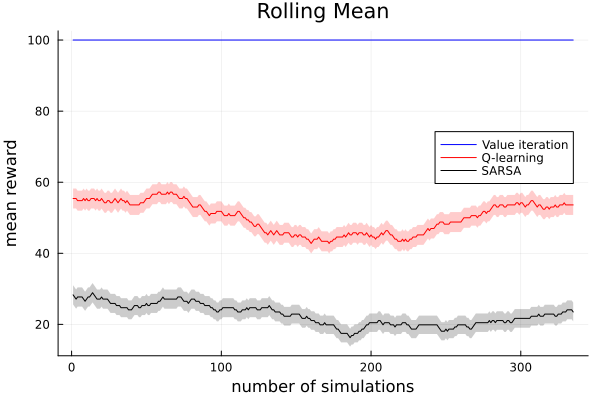

In [11]:
RoverGridWorld.plot_simulation_results(results)

## Solving using Value Iteration

In [12]:
using POMDPs
using DiscreteValueIteration

In [13]:
using Interact, Plots
# Interact.WebIO.install_jupyter_nbextension() # might be helpful if you see `WebIO` warnings in Jupyter
@manipulate for iter in slider(0:10:50, value = 0)
    rgw = RoverGridWorld.RoverGridWorldMDP(
            grid_size = (20,20),
            p_transition = 1.0,
            reward_vals = Dict((18,3)=>100))
    solver = ValueIterationSolver(max_iterations=iter);
    policy = POMDPs.solve(solver, rgw);
    RoverGridWorld.plot_grid_world(rgw, policy, iter, rgw.γ)
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any[nothing], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 6, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(1), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\sbanerj6\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\sbanerj6\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\InteractBase\\LJXv3\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\sbanerj6\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Base.GenericCondition{ReentrantLock}(Base.IntrusiveLinkedList{Task}(Task (runnable) @0x000001c1f85ceab0, Task (runnable) @0x000001c1f85ceab0), ReentrantLock(nothing, 0x00000000, 0x00, Base.GenericCondition{Base.Threads.SpinLock}(Base.IntrusiveLinkedList{Task}(nothing, nothing), Base.Threads.SpinLock(0)), (2, 1931719161104, 1931719161136)))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"0\",\"10\",\"20\",\"30\",\"40\",\"50\"],\"changes\":WebIO.getv

## View stepthrough of one policy

In [21]:
steps = RoverGridWorld.collect_stepthrough(rgw, policy, init_state = RoverGridWorld.State(20,20))
file_path = RoverGridWorld.create_simulated_episode_gif(rgw, policy, steps, fname="largegridworld_episode")

"gifs/largegridworld_episode.gif"

In [15]:
steps[end]

(s = BiMDPs.RoverGridWorld.State(18, 3), a = BiMDPs.RoverGridWorld.UP, r = 100.0)

In [16]:
rsum = sum(st.r for st in steps)
println("Undiscounted reward was $rsum.")

Undiscounted reward was 100.0.
